In [4]:
# %cd ../
import pyMelt as m
# %cd dev

/Users/sm905/repos/pyMelt
/Users/sm905/repos/pyMelt/dev


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
lz = m.lithologies.matthews.klb1()

In [6]:
px = m.lithologies.matthews.kg1()

In [8]:
mantle = m.mantle([lz, px], [0.9, 0.1], ['lz', 'px'])

In [9]:
column = mantle.adiabaticMelt(1400.0)

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:xlabel='Temperature (°C)', ylabel='Pressure (GPa)'>,
        <AxesSubplot:xlabel='Melt Fraction'>], dtype=object))

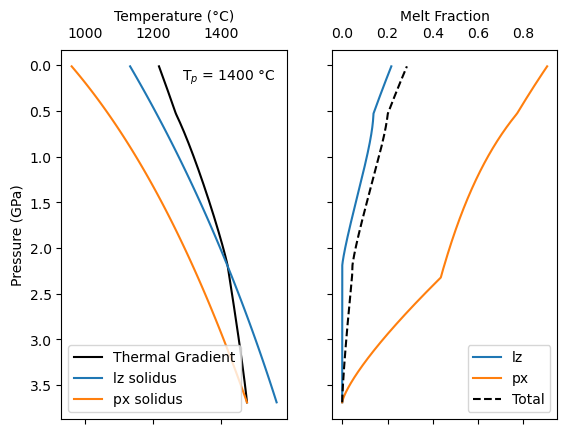

In [10]:
column.plot()

In [11]:
phasediag_klb1 = m.load_phaseDiagram('thermocalc_klb1')
phasediag_kg1 = m.load_phaseDiagram('thermocalc_kg1')

In [19]:
column.calculateChemistry(elements={'lz': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    'px': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    },
                          method='phase_diagram_major',
                          phaseDiagram={'lz': phasediag_klb1,
                                        'px': phasediag_kg1})

/Users/sm905/repos/pyMelt/pyMelt/meltingcolumn_classes.py:261: UserWarning: The fractional melting routine for phase diagrams is not implemented correctly.
  _warnings.warn("The fractional melting routine for phase diagrams is not implemented correctly.")
/Users/sm905/repos/pyMelt/pyMelt/chemistry/__init__.py:985: UserWarning: The MgO of rut could not be found.
  _warn('The ' + self.name + ' of ' + mineral + ' could not be found.')
/Users/sm905/repos/pyMelt/pyMelt/chemistry/__init__.py:985: UserWarning: The FeO of rut could not be found.
  _warn('The ' + self.name + ' of ' + mineral + ' could not be found.')


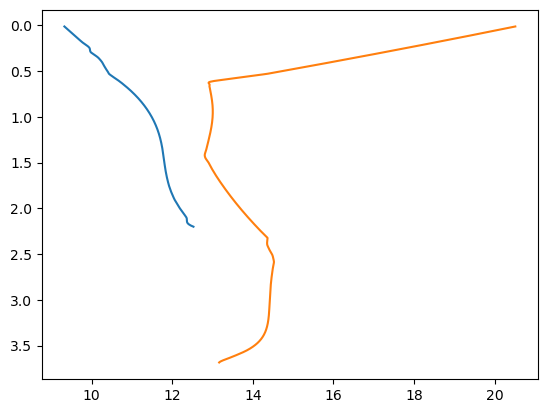

In [21]:
f, a = plt.subplots()

a.plot(column.composition['lz'].MgO,column.composition['lz'].P)
a.plot(column.composition['px'].MgO,column.composition['px'].P)

a.invert_yaxis()

plt.show()

In [22]:
column.calculateChemistry(elements={'lz': {'La': m.chemistry.data.workman05_dmm.La,
                                           'Yb': m.chemistry.data.workman05_dmm.Yb},
                                    'px': {'La': m.chemistry.data.stracke03_bsic.La,
                                           'Yb': m.chemistry.data.stracke03_bsic.Yb},},
                          method='phase_diagram_trace',
                          phaseDiagram={'lz': phasediag_klb1,
                                        'px': phasediag_kg1},
                          olv_D= {'La': m.chemistry.data.olv_D.La,
                                  'Yb': m.chemistry.data.olv_D.Yb,},
                          cpx_D= {'La': m.chemistry.data.cpx_D.La,
                                  'Yb': m.chemistry.data.cpx_D.Yb,},
                          opx_D= {'La': m.chemistry.data.opx_D.La,
                                  'Yb': m.chemistry.data.opx_D.Yb,},
                          spn_D= {'La': m.chemistry.data.spn_D.La,
                                  'Yb': m.chemistry.data.spn_D.Yb,},
                          grt_D= {'La': m.chemistry.data.grt_D.La,
                                  'Yb': m.chemistry.data.grt_D.Yb,},
                          plg_D= {'La': m.chemistry.data.plg_D.La,
                                  'Yb': m.chemistry.data.plg_D.Yb,},
                         )

/Users/sm905/repos/pyMelt/pyMelt/meltingcolumn_classes.py:261: UserWarning: The fractional melting routine for phase diagrams is not implemented correctly.
  _warnings.warn("The fractional melting routine for phase diagrams is not implemented correctly.")


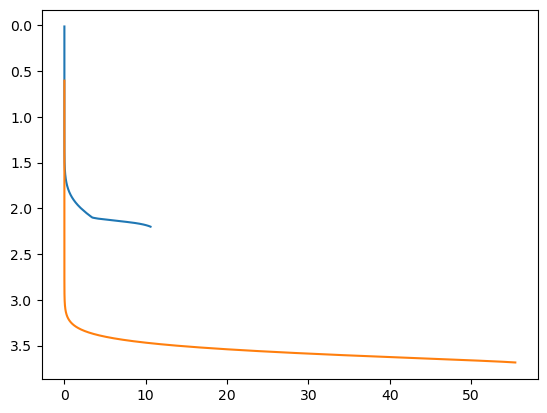

In [23]:
f, a = plt.subplots()

a.plot(column.composition['lz'].La/column.composition['lz'].Yb,column.composition['lz'].P)
a.plot(column.composition['px'].La/column.composition['px'].Yb,column.composition['px'].P)

a.invert_yaxis()

plt.show()

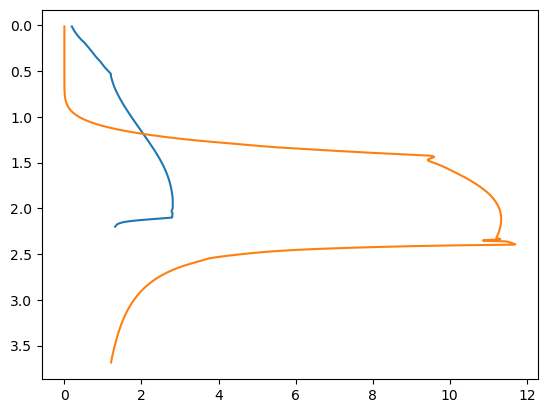

In [24]:
f, a = plt.subplots()

a.plot(column.composition['lz'].Yb,column.composition['lz'].P)
a.plot(column.composition['px'].Yb,column.composition['px'].P)

a.invert_yaxis()

plt.show()

In [25]:
column.calculateMineralProportions(method='phase_diagram_major',
                                   phaseDiagram={'lz': phasediag_klb1,
                                                 'px': phasediag_kg1})

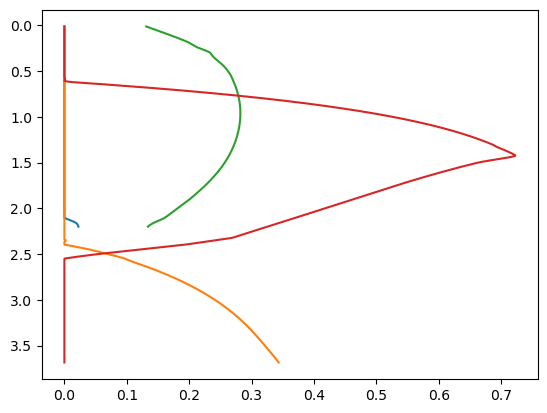

In [27]:
f, a = plt.subplots()

a.plot(column.composition['lz'].grt, column.composition['lz'].P)
a.plot(column.composition['px'].grt, column.composition['px'].P)

a.plot(column.composition['lz'].opx, column.composition['lz'].P)
a.plot(column.composition['px'].opx, column.composition['px'].P)

a.invert_yaxis()

plt.show()

In [31]:
species = 'MgO'

def WangBetaEqn(T, P, a, b, c, d, e, f, g, h, i):
    return ((a + b*P + c*P**2) * 1e6 / T**2 + (d + e*P + f*P**2) * (1e6/T**2)**2 
            + (g + h*P + i*P**2) * (1e6/T**2)**3)

fractionationFactors = {'olv': WangBetaEqn(1473.15, 1.0, 2.076, 7.183e-2, -4.672e-4, 
                                           1.049e-1, -3.359e-3, 5.009e-5, -1.192e-2, 2.739e-4, -5.518e-6),
                        'cpx': WangBetaEqn(1473.15, 1.0, 2.246, 8.548e-2, -7.425e-4, 
                                           1.025e-1, -3.369e-3, 5.172e-5, -1.169e-2, 2.834e-4, -5.514e-6),
                        'opx': WangBetaEqn(1473.15, 1.0, 2.246, 6.206e-2, -0.733e-4, 
                                           0.675e-1, -0.141e-3, -8.619e-5, -0.817e-2, -0.657e-4, 8.825e-6),
                        'grt': WangBetaEqn(1473.15, 1.0, 1.302, 2.732-2, 1.784e-4, 
                                           0.492e-1, 1.266e-3, -4.067e-5, -0.554e-2, -1.482e-4, 3.787e-6),
                        'spn': WangBetaEqn(1473.15, 1.0, 3.058, 6.216e-2, -3.720e-4, 
                                           0.847e-1, -3.421e-3, 5.116e-5, -1.132e-2, 2.555e-4, -5.551e-6),}

olvVal = fractionationFactors['olv']
for ff in fractionationFactors:
    fractionationFactors[ff] = fractionationFactors[ff] - olvVal

fractionationFactors

{'olv': 0.0,
 'cpx': 0.08400987754851319,
 'opx': 0.0670626656393527,
 'grt': -0.06243481282005503,
 'spn': 0.44384180785840255}

In [33]:
column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk={'lz': -0.24, 'px':-0.26}, 
                               fractionalExtraction=False, 
                               parameter='delta', )

[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.          0.08400988  0.06706267 -0.06243481  0.44384181]
[ 0.    

/Users/sm905/repos/pyMelt/pyMelt/meltingcolumn_classes.py:429: UserWarning: Isotope ratios for solid phases where their phase fraction goes < 0.01 are masked as a temporary fix to problematic imports.
  _warnings.warn("Isotope ratios for solid phases where their phase fraction "


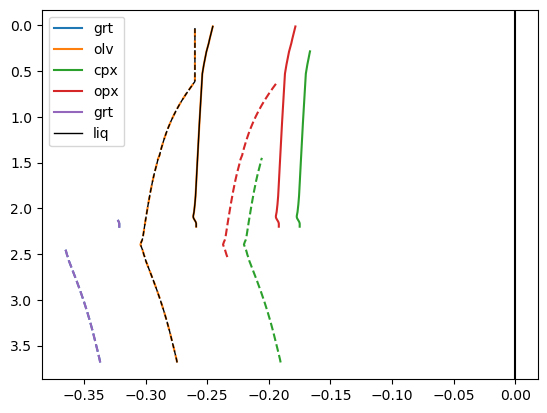

In [34]:
f, a = plt.subplots()

phases = ['grt', 'olv', 'cpx', 'opx', 'grt']



for i in range(len(phases)):
    ph = phases[i]
    a.plot(column.composition['lz'][ph + '_d26Mg'], column.composition['lz']['P'], c='C'+str(i), label=ph)
    a.plot(column.composition['px'][ph + '_d26Mg'], column.composition['px']['P'], c='C'+str(i), ls='--')

a.plot(column.composition['lz']['d26Mg'], column.composition['lz']['P'], c='k', label='liq', lw=1)
a.plot(column.composition['px']['d26Mg'], column.composition['px']['P'], c='k', ls='--', lw=1)

a.invert_yaxis()

a.legend()

a.axvline(0, c='k')

plt.show()

In [35]:
# Create a MORB basalt:
mor = m.geosettings.spreadingCentre(column)

In [36]:
mor.chemistry

MgO      12.939565
FeO       8.256464
La        2.601294
Yb        3.174362
d26Mg    -0.267901
dtype: float64

In [37]:
oib = m.geosettings.intraPlate(column, 
                               1.5 # The pressure at the bottom of the lithosphere
                               )

In [38]:
oib.chemistry

MgO      12.736691
FeO       7.638933
La        1.369915
Yb        2.479134
d26Mg    -0.255506
dtype: float64